## Survey of Russian film distribution data



Objective: to study the Russian film distribution market and identify current trends. Pay attention to films that have received state support. Try to answer the question of how interesting such films are to the viewer.

**To do this, we will:**

** Examine general information
* Pre-process the data: fill in the blanks, list data types, handle outliers.
* Add the columns we need to analyze.
* ¶¶ Conduct an exploratory analysis ¶¶ 
* Research films that have received government support.


**Data Description**

The `mkrf_movies` table contains information from the rental certificate registry. One movie can have several rental certificates.

- `title` - title of the movie;
- `puNumber` - number of rental certificate;
- `show_start_date` - premiere date of the movie;
- `type` - type of the movie;
- `film_studio` - production studio;
- `production_country` - production country;
- `director` - director;
- `producer` - producer;
- `age_restriction` - age category;
- `refundable_support` _-_ amount of refundable government support funds;
- `nonrefundable_support` _-_ amount of non-refundable state support funds;
- `financing_source` _-_ the source of public funding;
- `budget` _-_ the total budget of the movie;
- `ratings` _-_ the movie's rating on MoviePoetry;
- `genres` _-_ the genre of the movie.

The `budget` column already includes the full amount of government support. The data in this column is only for those films that received state support.

Table `mkrf_shows` contains information about film screenings in Russian cinemas.

- `puNumber` - number of the rental certificate;
- `box_office` - box office receipts in rubles.



### Step 1: Open the data files and merge them into a single dataframe. 

Merge the data so that all objects from the `mkrf_movies` dataset are included in the resulting dataframe. 


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
movies_df = pd.read_csv('https://code.s3.yandex.net/datasets/mkrf_movies.csv')
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

We will merge by column `puNumber` - number of rental license. To do this, first replace the word "no" in the column with 0 and then change the data type to int64

In [3]:
movies_df.loc[movies_df['puNumber']=='нет', 'puNumber'] = 0 
movies_df['puNumber'] = movies_df['puNumber'].astype('int64')

In [4]:
shows_df = pd.read_csv('/datasets/mkrf_shows.csv')
shows_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


In [84]:
df = movies_df.merge(shows_df, on='puNumber', how='left')


In [85]:
df.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   int64  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_


The number of rows in the resulting dataset matches the source ('budget'). It means that the result is correct.
    
When the number of rows does not match: if we choose the wrong join method. For example, if we choose right, the resulting dataset will include all values from the 'right' dataset, so about 4000 rows of the left one will be cut off.


In [8]:
pd.options.display.float_format = '{:,.2f}'.format

### Step 2: Data preprocessing

#### Step 2.1. Check the data types

- Check the data types in the dataframe and convert them where necessary.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   int64  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

Let's change the data type of the following columns:
* show_start_date to datetime
* ratings to float32
* refundable_support, nonrefundable_support, budget, box_office to float32 to save memory
* puNumber on int32 to save memory

In [87]:
df['show_start_date'] = pd.to_datetime(df['show_start_date'], format="%Y-%m-%dT%H:%M:%S.%fZ")

In [88]:
df['show_start_date'].head()

0   2015-11-27 12:00:00
1   2016-09-13 12:00:00
2   2016-10-10 12:00:00
3   2016-06-10 12:00:00
4   2015-07-29 12:00:00
Name: show_start_date, dtype: datetime64[ns]

In [12]:
float_cols = [ 'refundable_support', 'nonrefundable_support', 'budget', 'box_office']
for col in float_cols:
    df[col] = df[col].astype('float32')


In [13]:
df['ratings'].value_counts()

6.6    312
6.7    308
6.8    261
7.2    252
6.2    243
      ... 
64%      1
1.0      1
89%      1
8.9      1
9.2      1
Name: ratings, Length: 94, dtype: int64

In [14]:
for i in df['ratings']:
    if '%' in str(i):
        #df.loc[i,df['ratings']] = int(i[:-1])/10
        n = int(i[:-1])/10
        df.loc[df['ratings']==i, 'ratings'] = n

In [15]:
df['ratings'].isna().sum()

967

In our analysis, we will discard ratings equal to 0 and 10. So we will replace the missing values in the rating column with 0 and then change the data type.

In [16]:
df['ratings'] = df['ratings'].fillna(0).astype('float32')

#### Step 2.2 Examine the gaps in the dataframe

- Explain why you filled in the gaps in a certain way or why you did not.

<Figure size 720x432 with 0 Axes>

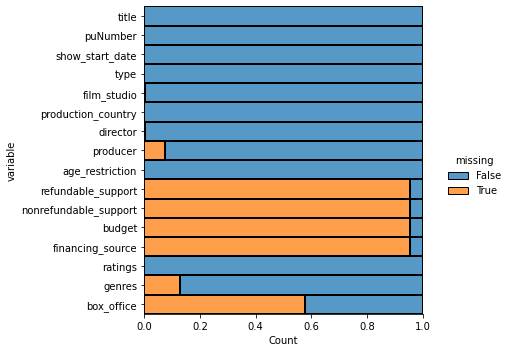

In [17]:
plt.figure(figsize=(10,6))
sns.displot(
    data=df.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)

In [18]:
round(df.isnull().mean()*100,2) 

title                    0.00
puNumber                 0.00
show_start_date          0.00
type                     0.00
film_studio              0.24
production_country       0.03
director                 0.12
producer                 7.59
age_restriction          0.00
refundable_support      95.57
nonrefundable_support   95.57
budget                  95.57
financing_source        95.57
ratings                  0.00
genres                  13.04
box_office              57.81
dtype: float64

**Detected data omissions in the following columns :**

* `refundable_support, nonrefundable_support, budget, financing_source` - columns related to government support. Since the budget column contains data only for those films that received state support, missing data will mean that the film did not receive funding. Bottom line: leave out the blanks
* `box_office` - fees in rubles. We have no sources from which we could fill in the blanks, so we leave them as they are
* `producer, genres` - we also leave them as they are.
* steel columns the share of omissions is small and will not affect the results of the analysis



#### Step 2.3 Examine duplicates in the dataframe
- Examine whether there are duplicates in the dataframe. Describe the reasons that may have influenced the occurrence of duplicates.

In [19]:
df.duplicated().sum()

0

No complete duplicates were found. Let's check implicit duplicates.

In [20]:
dup_df = df['title'].value_counts().reset_index(name="count").query("count >= 2")
dup_df

,index,count
0,День святого Валентина_,5
1,Начало_,4
2,Шерлок Холмс,4
3,Химера,4
4,Безумцы,4
...,...,...
553,Отчаянная домохозяйка,2
554,Пуленепробиваемый.,2
555,Оружейный барон,2
556,Сейчас самое время,2


In [21]:
df.query('title in @dup_df["index"] and budget.notnull()')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3614,Три сестры,111004417,2017-06-09 12:00:00,Художественный,"ООО ""РТВ"", АО ""ТПО ""Киностудия им. М.Горького""...",Россия,Ю.Грымов,"Ю.Грымов, С.Зернов",«16+» - для детей старше 16 лет,0.00,"25,000,000.00","37,878,788.00",Министерство культуры,0.00,NaN,"1,067,649.00"
5829,Прощаться не будем,111003418,2018-06-21 12:00:00,Художественный,"ООО ""РФГ Корп"", ООО ""Студия ""МОСТ""",Россия,П.Дроздов,А.Петрухин,«6+» - для детей старше 6 лет,0.00,"35,000,000.00","109,814,240.00",Министерство культуры,5.80,"военный,драма,история","5,539,973.00"
6898,Мысленный волк,111007419,2019-06-09 12:00:00,Художественный,"ООО ""САГА""",Россия,Валерия Гай Германика,"А.Савельев, А.Васильев, Валерия Гай Германика",«16+» - для детей старше 16 лет,0.00,"30,000,000.00","48,000,000.00",Министерство культуры,5.30,"фэнтези,драма,фильм-нуар","2,258,384.00"
7322,Успех,111018519,2019-11-04 12:00:00,Художественный,"ООО ""Кинодом""",Россия,П.Руминов,"С.Бобза, Г.Малков, В.Поляков, М.Кучмент",«12+» - для детей старше 12 лет,"5,000,000.00","20,000,000.00","75,000,000.00",Фонд кино,7.80,драма,"3,181,218.00"
7474,Вторжение,111022519,2019-12-23 12:00:00,Художественный,"ООО ""Арт Пикчерс Студия"", ООО ""Водород 2011""",Россия,Ф.Бондарчук,"Ф.Бондарчук, М.Врубель, А.Андрющенко, Д.Рудовский",«12+» - для детей старше 12 лет,"100,000,000.00","400,000,000.00","944,000,000.00",Фонд кино,5.70,"фантастика,боевик",NaN


The same films were shown at different times - they have a different number of the distribution license. Only 5 films have a budget, the rest do not fall under the terms of the analysis. 


#### Step 2.4. Examine the categorical values

- See the common problem found in almost all categorical columns;
- Fix the problematic values in the `type` field.



In [22]:
df['type'].value_counts()

Художественный                4520
 Художественный               1389
Анимационный                   828
Прочие                         406
Документальный                 288
Научно-популярный               53
Музыкально-развлекательный       1
 Анимационный                    1
Name: type, dtype: int64

We see several values with a space at the beginning of the string. let's fix it

In [23]:
df['type'] = df['type'].str.strip()

In [24]:
df['type'].value_counts()

Художественный                5909
Анимационный                   829
Прочие                         406
Документальный                 288
Научно-популярный               53
Музыкально-развлекательный       1
Name: type, dtype: int64

In [25]:
df['film_studio'].value_counts().reset_index(name="count").query("count >= 10")

,index,count
0,"Киностудия ""Мосфильм""",341
1,"ООО ""Мульт в кино""",57
2,Анимаккорд Лтд,23
3,"ООО ""Мульт в кино""",18
4,"ФГУП ""ТПО ""Киностудия ""Союзмультфильм""",16
5,"ООО ""ТаББаК""",15
6,Р А И Синема,14
7,"ООО ""Студия анимационного кино ""Мельница""",14
8,Опус Арте,14
9,"ООО ""Кинокомпания ""СТВ""",13


In [26]:
df['film_studio'] = df['film_studio'].str.strip()

In [27]:
df['production_country'].value_counts()

США                                                                                       2172
Россия                                                                                    1821
СССР                                                                                       347
Франция                                                                                    301
Великобритания                                                                             257
                                                                                          ... 
Великобритания-США-Германия-КНР                                                              1
Испания - Швейцария - Великобритания - Германия - Новая Зеландия - Нидерланды - Канада       1
Россия - Германия - Украина                                                                  1
Бельгия - Нидерланды - Франция                                                               1
Франция-Великобритания-Чехия                      

In the country column, enumerations are indicated with a comma and a dash. Let's harmonize the format

In [28]:
df['production_country'] = df['production_country'].str.replace(' -',',').str.replace('-',', ')

In [29]:
df['production_country'].value_counts()

США                             2172
Россия                          1821
СССР                             347
Франция                          301
Великобритания                   257
                                ... 
США, Германия, Нидерланды          1
Исландия, Ирландия, Германия       1
СССР, Финляндия                    1
Франция, Бельгия, Испания          1
США, ЮАР, Гонконг                  1
Name: production_country, Length: 835, dtype: int64

In [30]:
df['genres'].value_counts()

драма                            476
комедия                          352
мелодрама,комедия                222
драма,мелодрама,комедия          189
драма,мелодрама                  183
                                ... 
комедия,приключения,криминал       1
фэнтези,боевик,криминал            1
драма,фантастика,ужасы             1
приключения,триллер,биография      1
мелодрама,драма,фэнтези            1
Name: genres, Length: 742, dtype: int64

In [31]:
df['financing_source'].value_counts()

Министерство культуры               164
Фонд кино                           146
Министерство культуры, Фонд кино     22
Name: financing_source, dtype: int64

The problem is in the categorical columns: several additional genres are specified in one cell at once. For ease of analysis, it is worth separating one main genre into a separate column.

#### Step 2.5. Check the quantitative values

- Check if any suspicious data is found in such columns. What is the best way to deal with such data?


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  7486 non-null   object        
 1   puNumber               7486 non-null   int64         
 2   show_start_date        7486 non-null   datetime64[ns]
 3   type                   7486 non-null   object        
 4   film_studio            7468 non-null   object        
 5   production_country     7484 non-null   object        
 6   director               7477 non-null   object        
 7   producer               6918 non-null   object        
 8   age_restriction        7486 non-null   object        
 9   refundable_support     332 non-null    float32       
 10  nonrefundable_support  332 non-null    float32       
 11  budget                 332 non-null    float32       
 12  financing_source       332 non-null    object        
 13  rat

In [33]:
df.describe()

,puNumber,refundable_support,nonrefundable_support,budget,ratings,box_office
count,"7,486.00",332.00,332.00,332.00,"7,486.00","3,158.00"
mean,"135,178,527.64","11,864,457.00","48,980,984.00","127,229,720.00",5.65,"76,478,696.00"
std,"38,382,177.41","24,916,554.00","59,980,116.00","188,588,336.00",2.41,"240,353,120.00"
min,0.00,0.00,0.00,0.00,0.00,0.00
25%,"112,025,043.00",0.00,"25,000,000.00","42,000,000.00",5.40,"86,239.00"
50%,"121,015,464.50",0.00,"30,000,000.00","68,649,920.00",6.40,"2,327,987.50"
75%,"124,003,313.75","15,000,000.00","40,375,000.00","141,985,312.00",7.20,"23,979,672.00"
max,"231,001,111.00","180,000,000.00","400,000,000.00","2,305,074,176.00",9.90,"3,073,568,768.00"


<AxesSubplot:>

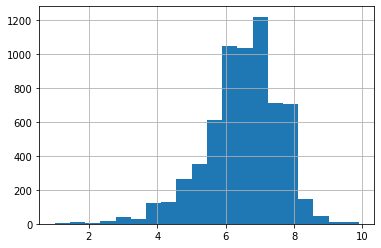

In [34]:
df.query('ratings>0')['ratings'].hist(bins=20)

No outliers

Let's make a separate dataset for movies that received a budget. See how the columns `refundable_support', 'nonrefundable_support', 'financing_source', 'budget' are related and if there are any outliers.

The budget consists of refundable and non-refundable funds and additional sources of funding for which we do not have data. Therefore, where there is no budget, we cannot fill in the gaps with the amount of non-refundable and refundable funds.

In [35]:
df.query('nonrefundable_support > budget')['budget'].count()

16

Filming a movie starts at 5 million rubles. The most expensive Russian movie had a budget of $50 million (~3033750000 rubles). Let's see if there are any abnormal values in the budget.

In [36]:
budget_df = df.query('budget.notnull()')

(array([-0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

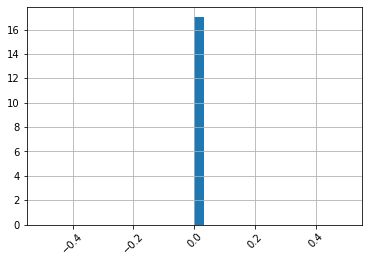

In [37]:
budget_df.query('budget<=5000000')['budget'].hist(bins=30)
plt.ticklabel_format(useOffset=False, style='plain')
plt.xticks(rotation = 45)

(array([0.00e+00, 2.50e+08, 5.00e+08, 7.50e+08, 1.00e+09, 1.25e+09,
        1.50e+09, 1.75e+09, 2.00e+09, 2.25e+09, 2.50e+09]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

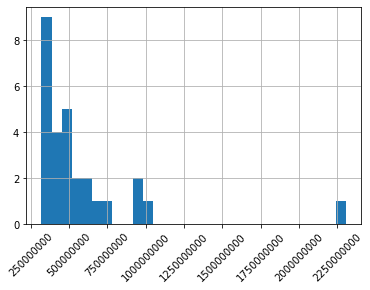

In [38]:
budget_df.query('budget>300000000')['budget'].hist(bins=30)
plt.ticklabel_format(useOffset=False, style='plain')
plt.xticks(rotation = 45)

At first glance, there's no problem, but let's look at the most expensive movies up close

In [39]:
pd.options.display.float_format = '{:.1f}'.format
budget_df.sort_values(by='budget', ascending=False).head(15)


,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
7114,Тайна Печати Дракона,111012819,2019-09-12 12:00:00,Художественный,"ООО ""Кинокомпания ""СТВ""; ООО ""РФГ Корп""; ООО ""...","Россия, Китай",О.Степченко,"С.Сельянов, А.Петрухин",«6+» - для детей старше 6 лет,180000000.0,90000000.0,2305074176.0,Фонд кино,5.8,"приключения,фэнтези",333597056.0
5437,Матильда,111005717,2017-08-17 12:00:00,Художественный,"ООО ""ТПО ""РОК"", ООО ""Матильда""",Россия,А.Учитель,"А.Учитель, А.Достман, В.Винокур",«16+» - для детей старше 16 лет,110000000.0,190000000.0,1032905984.0,Фонд кино,7.7,"фэнтези,комедия,семейный",511775552.0
7464,Союз спасения,111022019,2019-12-26 12:00:00,Художественный,"ЗАО ""Дирекция кино""",Россия,А.Кравчук,"А.Максимов, К.Эрнст",«12+» - для детей старше 12 лет,100000000.0,400000000.0,980000000.0,Фонд кино,6.0,"история,биография,драма",717703168.0
7474,Вторжение,111022519,2019-12-23 12:00:00,Художественный,"ООО ""Арт Пикчерс Студия"", ООО ""Водород 2011""",Россия,Ф.Бондарчук,"Ф.Бондарчук, М.Врубель, А.Андрющенко, Д.Рудовский",«12+» - для детей старше 12 лет,100000000.0,400000000.0,944000000.0,Фонд кино,5.7,"фантастика,боевик",NaN
7171,Грех,111014419,2019-08-31 12:00:00,Художественный,НО Фонд Андрея Кончаловского по поддержке кино...,"Россия, Италия",А.Михалков (псевдоним А.Кончаловский),НО Фонд Андрея Кончаловского по поддержке кино...,«16+» - для детей старше 16 лет,0.0,60000000.0,779941952.0,Министерство культуры,6.9,"драма,биография,история",54243204.0
3351,Дуэлянт,111015416,2016-09-14 12:00:00,Художественный,"ООО ""Нон-Стоп Продакшн""",Россия,А.Мизгирев,"А.Роднянский, С.Мелькумов",«16+» - для детей старше 16 лет,150000000.0,300000000.0,684200512.0,Фонд кино,6.6,драма,364285152.0
2920,Экипаж .,111005416,2016-03-21 12:00:00,Художественный,"ООО ""Студия ""ТРИТЭ"" Никиты Михалкова""",Россия,Н.Лебедев,"Л.Верещагин, А.Златопольский, Н.Михалков, ООО ...",«6+» - для детей старше 6 лет,50000000.0,392104480.0,635283840.0,Фонд кино,7.6,"драма,триллер,приключения",1402255360.0
5653,Движение вверх,111011817,2017-12-21 12:00:00,Художественный,"ООО ""Студия ""ТРИТЭ"" Никиты Михалкова""",Россия,А.Мегердичев,"Л.Верещагин, А.Златопольский, Н.Михалков, ООО ...",«6+» - для детей старше 6 лет,0.0,400000000.0,590192192.0,Фонд кино,7.5,"спорт,драма",2779686144.0
6549,Т-34,111024918,2018-12-21 12:00:00,Художественный,"ООО ""Кинокомпания МАРС-фильм"" по заказу ООО ""М...",Россия,А.Сидоров,"А.Златопольский, Р.Дишдишян, Л.Блаватник, Н.Яр...",«12+» - для детей старше 12 лет,60000000.0,120000000.0,563784704.0,Фонд кино,6.5,"драма,военный,боевик",2271753984.0
3255,Время первых (2017),111001317,2017-02-21 12:00:00,Художественный,"ООО ""ТаББаК"", ООО ""Студия Третий Рим""",Россия,Д.Киселев,"Т.Бекмамбетов, Е.Миронов",«6+» - для детей старше 6 лет,75000000.0,175000000.0,528441984.0,Фонд кино,7.5,"приключения,триллер,биография",544332288.0


No problems detected. Let's look at the box office. 

<AxesSubplot:>

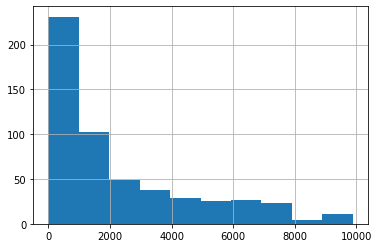

In [40]:
df.query('box_office<10000')['box_office'].hist()

In [41]:
df.query('box_office<10000')['box_office'].count()

539

There are 539 records where the fees in rubles amounted to less than 10000. This data looks dubious, so we will not consider it in the study.

Let's look at the share of such films among those that received state support.

In [42]:
round(df.query('box_office<10000')['budget'].count()/df['box_office'].count()*100, 2)

0.13

The percentage of such movies is 13 hundredths of a percent.

#### Step 2.6. Add new columns




- Create a column with information about the year of distribution. Highlight the year from the premiere date of the movie.

In [43]:
df['show_start_year'] = df['show_start_date'].dt.year

- Create two columns: the first and last name of the main director and the main genre of the movie. The columns will contain the first values from the list of directors and genres respectively.


In [44]:
df['main_genre'] = df['genres'].fillna('нет').str.split(',',n=1,expand=True)[0]
df['main_director'] = df['director'].str.split(',',n=1,expand=True)[0]

In [45]:
df.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_start_year,main_genre,main_director
0,Открытый простор,221048915,2015-11-27 12:00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN,2015,боевик,Кевин Костнер
1,Особо важное задание,111013716,2016-09-13 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN,2016,драма,Е.Матвеев
2,Особо опасен,221038416,2016-10-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2016,фантастика,Тимур Бекмамбетов
3,Особо опасен,221026916,2016-06-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2016,фантастика,Тимур Бекмамбетов
4,Особо опасен,221030815,2015-07-29 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2015,фантастика,Тимур Бекмамбетов


Let's create another column with the main studio to make a list of funding recommendations later.

In [46]:
df['main_studio'] = df['film_studio'].str.split(',',n=1,expand=True)[0]

- Calculate how much of the total budget of the movie is government support.

In [47]:
df['funds_percentage'] = (df['refundable_support']+df['nonrefundable_support'])/df['budget']*100


budget_df = df.query('funds_percentage.notnull() and budget>0')


In [48]:
budget_df['funds_percentage'].describe()

count   315.0
mean     51.7
std      17.0
min       4.4
25%      37.3
50%      59.2
75%      65.7
max      78.5
Name: funds_percentage, dtype: float64

* Minimum share of state support: ~4%
* Average share of state support: ~52%
* Maximum share of state support: ~79%

### Step 3: Conduct an exploratory analysis of the data


- See how many movies were released each year. Note that not all films have the same theatrical release data. Calculate the proportion of films with the specified theatrical release information.

In [49]:
print('Доля фильмов с указанной информацией о сборах:',round(df['box_office'].count()/df['puNumber'].count()*100, 1))

Доля фильмов с указанной информацией о сборах: 42.2


In [94]:
print('Доли фиильмов с указанной информацией о сборах')
for i in range(2010,2020):
    result = df.loc[df['show_start_year']==i, 'box_office'].count()/df.loc[df['show_start_year']==i, 'puNumber'].count()*100
    print(f'{i} - {round(result,1)}%')

Доли фиильмов с указанной информацией о сборах
2010 - 10.7%
2011 - 17.5%
2012 - 21.6%
2013 - 29.2%
2014 - 34.6%
2015 - 66.0%
2016 - 64.3%
2017 - 70.7%
2018 - 53.3%
2019 - 57.0%



In 2010, the least share of movies with information on fees was 10.7%. 
After that, the share increased steadily, peaking at 70.7% in 2017
In 2018, it dropped to 53%.


In [51]:

print('Доля фильмов с указанной информацией о годе премьеры:',round(df['show_start_year'].count()/df['puNumber'].count()*100, 1))


Доля фильмов с указанной информацией о годе премьеры: 100.0


<AxesSubplot:>

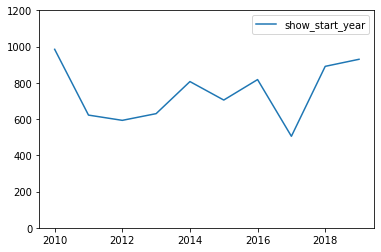

In [52]:
years_df = df['show_start_year'].value_counts().sort_index().to_frame()
years_df.plot(ylim=(0,1200))


In [53]:
years_df

,show_start_year
2010,985
2011,622
2012,593
2013,630
2014,807
2015,705
2016,818
2017,505
2018,891
2019,930


In [54]:
year_group=df.groupby('show_start_year')['puNumber'].count()
print(year_group.sum()==df['puNumber'].count())

True


In [55]:
df['show_start_date'].dt.year.value_counts()

2010    985
2019    930
2018    891
2016    818
2014    807
2015    705
2013    630
2011    622
2012    593
2017    505
Name: show_start_date, dtype: int64

2010 saw the highest number of films released in theaters, 985.
Until 2012 followed the first sharp decline to 593 films. 
In 2016 the figures rose to 818, but 2015 saw the lowest drop to 505 films.
After that there was an increase and in 2019 the figures are close to 2010 with 930 movies.


Minimum dues were in 2013, maximum in 2019


- Using the summary table, calculate the average and median amount of fees for each year.

In [56]:
box_office_df = df.query('box_office>10000 and budget.isnull()').pivot_table(index='show_start_year', values='box_office', aggfunc=['min','max','mean','median', 'count'])
box_office_df


,min,max,mean,median,count
,box_office,box_office,box_office,box_office,box_office
show_start_year,,,,,
2010,10685.0,1446400.0,113738.5,23612.5,20
2011,10320.0,11618085.0,514028.0,42691.0,27
2012,10310.0,2311220.0,135530.3,30607.5,50
2013,10135.0,4321638.0,161182.2,33360.0,57
2014,10345.0,1016410624.0,43427616.0,256320.0,148
2015,11300.0,1658861440.0,94963424.0,6144303.0,355
2016,11740.0,2048126080.0,94109352.0,4177689.0,444
2017,24310.0,2118396160.0,118923104.0,9580738.0,317


**For films without government funding:**

** Minimum collections were in 2013, maximum in 2019**
* Minimum collections rose from 2017 through 2018 with a peak of 41,000, then dropped to 35,000.
* Maximum collections began a sharp rise from 2014 and peaked at 2.5 billion in 2019, after a slight dip in 2018.
* Median fees started rising in 2014, peaked in 2017 (9.5 million), then went into decline


Conclusions about averages and medians:
    The big difference is the average is much larger than the median. This makes sense, as in every year there are box office hits that collect at the box office many times more than other movies.
    


In [57]:
box_office_rus_df = df.query('box_office>10000 and budget.notnull()').pivot_table(index='show_start_year', values='box_office', aggfunc=['min','max','mean','median', 'count'])

box_office_rus_df

,min,max,mean,median,count
,box_office,box_office,box_office,box_office,box_office
show_start_year,,,,,
2013,365353.6,19957032.0,10161193.0,10161193.0,2
2014,28140.0,393344640.0,63588888.0,5504518.0,16
2015,19820.0,704928192.0,70552112.0,10166676.0,82
2016,35897.0,1402255360.0,103079640.0,19027902.0,59
2017,168512.0,2779686144.0,278591680.0,50451948.0,39
2018,55685.0,2271753984.0,177394096.0,27023392.0,56
2019,75850.0,3073568768.0,140160464.0,25977292.0,60


**For state-financed movies:**

* Minimum in 2015 is 19820. Maximum in 2019 is 3 billion
* Minimum collections have 2 peaks - 2013 and 2017. 
* Maximum collections increased steadily until 2017, dropped slightly afterward, but peaked at 3 billion in 2019.
* Median peaks in 2017 (50 million), after mdiana went down after that

- Examine how the dynamics of the box office changed by year. In which year was the amount of collections the lowest? And the highest?

<AxesSubplot:xlabel='show_start_year'>

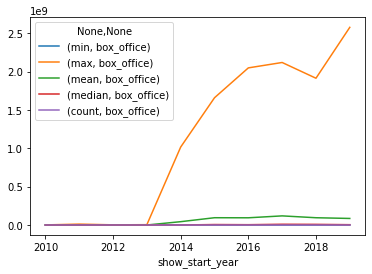

In [58]:
box_office_df.plot()

<AxesSubplot:xlabel='show_start_year'>

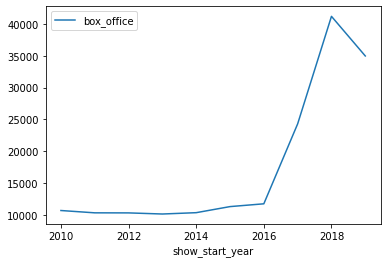

In [59]:
box_office_df['min'].plot()

**For all movies**

* Minimum income skyrocketed 4 times in 2016, followed by a downturn.
* Maximum income rose sharply from 2013 to 2017, after which it declined slightly and peaked in 2019

<AxesSubplot:xlabel='show_start_year'>

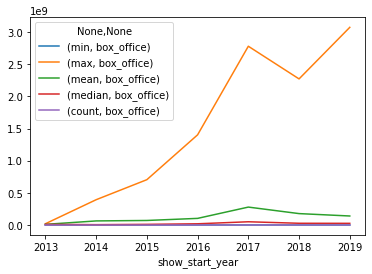

In [60]:
box_office_rus_df.plot()

<AxesSubplot:xlabel='show_start_year'>

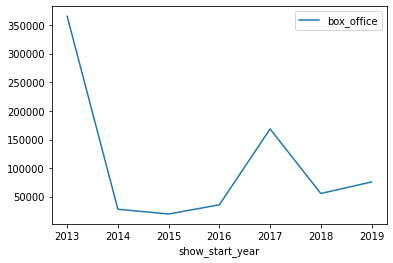

In [61]:
box_office_rus_df['min'].plot()

**For state-financed films**

* in 2013 there was a sharp jump in the maximum revenue from theatrical distribution. 
* Minimum income became less from 2013 to 2014 by 7 times. By 2017 it was up, but lost ground in 2018

Curious observation:
The minimum box office for Russian films is ~20,000, while even if we consider unfinanced films whose box office is over 10,000, such amount becomes minimum only in 2017.

- Determine if the age limit of the audience ("6+", "12+", "16+", "18+", etc.) affects the movie's box office receipts from 2015 to 2019? Films with what age limit have grossed the most money at the box office? Does the picture change from year to year? If yes, suggest what this might be related to.

In [62]:
df['age_restriction'].value_counts()

«16+» - для детей старше 16 лет           2851
«18+» - запрещено для детей               1605
«12+» - для детей старше 12 лет           1593
«0+» - для любой зрительской аудитории     811
«6+» - для детей старше 6 лет              626
Name: age_restriction, dtype: int64

<AxesSubplot:ylabel='age_restriction'>

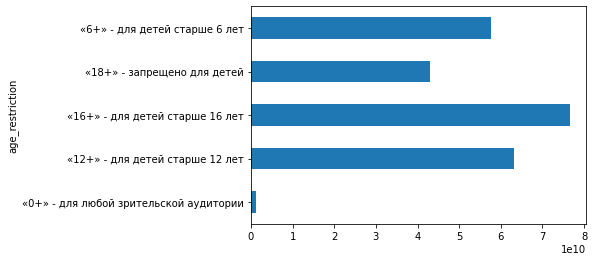

In [63]:
df.groupby(by='age_restriction')['box_office'].sum().plot(kind='barh')

<AxesSubplot:xlabel='None-show_start_year', ylabel='age_restriction'>

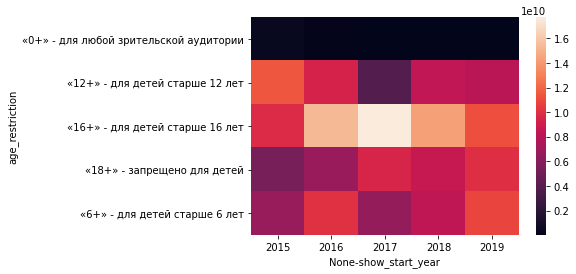

In [64]:
restriction_pivot=df.query('2015<=show_start_year<=2019 and budget.isnull()').pivot_table(index='age_restriction',columns='show_start_year', values='box_office', aggfunc=['sum'])
sns.heatmap(restriction_pivot, xticklabels=['2015','2016','2017','2018','2019'])

array([<AxesSubplot:xlabel='None,show_start_year'>,
       <AxesSubplot:xlabel='None,show_start_year'>,
       <AxesSubplot:xlabel='None,show_start_year'>,
       <AxesSubplot:xlabel='None,show_start_year'>,
       <AxesSubplot:xlabel='None,show_start_year'>], dtype=object)

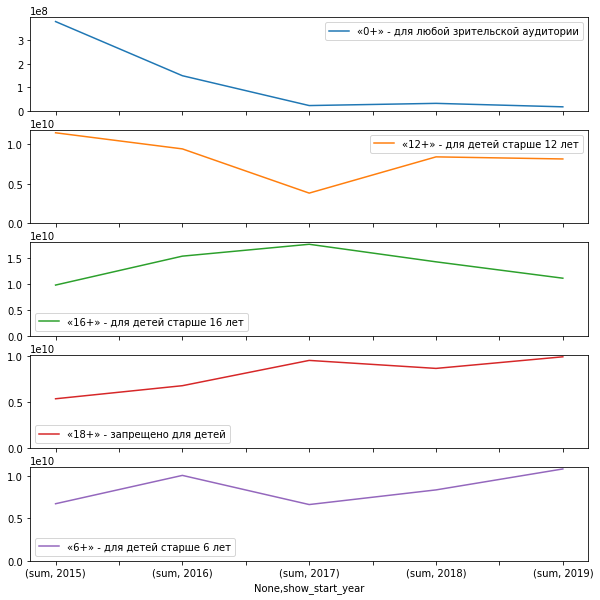

In [65]:

restriction_pivot1 = restriction_pivot.transpose()

restriction_pivot1.plot.line(subplots=True,figsize=(10,10), ylim=(0))


**For films without funding:**

* For the time period from 2015 to 2019, 16+ films made the most money at the box office. 12+ movies made the least
* In 2017, there was a turning point for all categories:
    * Rental movies for all audiences reached a minimum value
    * Distribution of movies for kids 12+ started to grow
    * Distribution of movies for kids over 16 peaked, followed by a decline
    * Distribution of movies banned for children reached a minimum, followed by growth
* Movies for kids over 6 and movies banned for kids see an increase in box office money in 2019.

<AxesSubplot:xlabel='None-show_start_year', ylabel='age_restriction'>

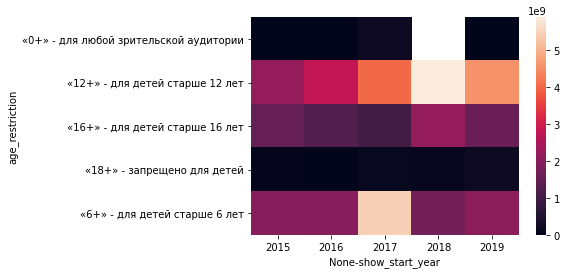

In [66]:
fund_restriction_pivot=df.query('2015<=show_start_year<=2019 and budget.notnull()').pivot_table(index='age_restriction',columns='show_start_year', values='box_office', aggfunc=['sum'])
sns.heatmap(fund_restriction_pivot, xticklabels=['2015','2016','2017','2018','2019']
           )

array([<AxesSubplot:xlabel='None,show_start_year'>,
       <AxesSubplot:xlabel='None,show_start_year'>,
       <AxesSubplot:xlabel='None,show_start_year'>,
       <AxesSubplot:xlabel='None,show_start_year'>,
       <AxesSubplot:xlabel='None,show_start_year'>], dtype=object)

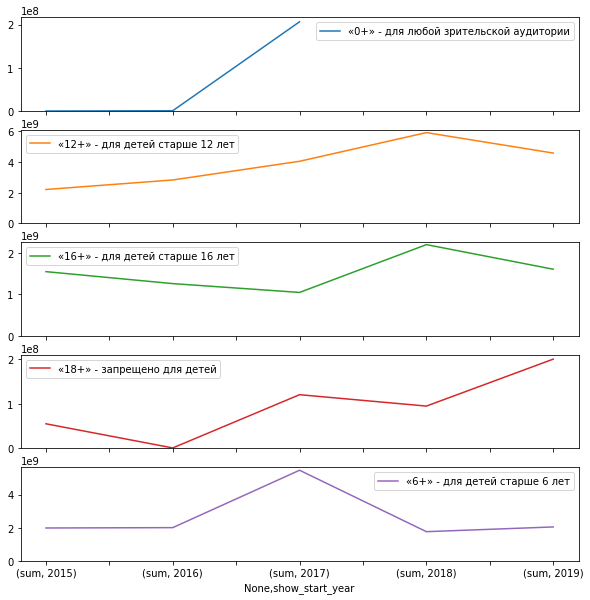

In [67]:
fund_restriction_pivot1= fund_restriction_pivot.transpose()
fund_restriction_pivot1.plot.line(subplots=True,figsize=(10,10), ylim=(0))


**For films that have received government funding:**

* The highest revenue comes from films in the 12+ category, followed by 6+. Films 0+ and 18+ are the least popular films
* 0+ and 18+ films received the least money at the box office.
* 12+ films received the most money at the box office
* 0+, 16+ and 18+ films started to grow in 2016. The performance of the last 2 deteriorated after 2018. 
* For 2019, we see an increase in the figures for 18+ and 6+ movies.

**Conclusion:**

There is a difference between the money in the distribution of films without government funding and those with government funding. 
For the first group, the largest distribution is for films 16+, for the second group - 12+. 

For both groups, we see a trend towards an increase in the distribution of 18+ films. 


What is associated with the change in revenue depending on the age limit:
 - Children under 6 are less likely to visit movie theaters due to physiological and mental characteristics
- 6 to 12 are more likely to watch cartoons
 - 12+ category includes many movies for family viewing, when the theater can be visited by the whole family, and therefore more tickets are served, as well as cartoons - that is, the size of the overlap is clearly greater.
 - 18+ is attended only by adults, so on weekdays during the daytime the halls are not completely filled, as it is standard working hours.


### Step 4: Research films that have received government support

There are no specific instructions or assignments in this step - look for interesting patterns in the data. Look at how much funding is allocated to support movies. Check to see if such movies have a good return on investment and what their ratings are.

At this stage, we will cut off films that received more than 1 billion rubles at the box office, as these are obvious outliers that may give incorrect conclusions. It is better to look at them separately.

In [68]:
df.query('budget.notnull() and box_office>1000000000')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,budget,financing_source,ratings,genres,box_office,show_start_year,main_genre,main_director,main_studio,funds_percentage
2920,Экипаж .,111005416,2016-03-21 12:00:00,Художественный,"ООО ""Студия ""ТРИТЭ"" Никиты Михалкова""",Россия,Н.Лебедев,"Л.Верещагин, А.Златопольский, Н.Михалков, ООО ...",«6+» - для детей старше 6 лет,50000000.0,...,635283840.0,Фонд кино,7.6,"драма,триллер,приключения",1402255360.0,2016,драма,Н.Лебедев,"ООО ""Студия ""ТРИТЭ"" Никиты Михалкова""",69.6
3565,Притяжение (2016),111018116,2016-12-16 12:00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.0,...,0.0,Фонд кино,5.6,фантастика,1038321472.0,2016,фантастика,Ф.Бондарчук,"ООО ""Водород 2011""",inf
5505,Последний богатырь,111007017,2017-10-19 12:00:00,Художественный,"ООО ""Киностудия ""Слово"" по заказу ООО ""Уолт Ди...",Россия,Д.Дьяченко,"Э.Илоян, Д.Жалинский, М.Озкан, А.Троцюк, В.Шляппо",«12+» - для детей старше 12 лет,50000000.0,...,352477568.0,Фонд кино,6.8,"комедия,фэнтези,приключения",1655037696.0,2017,комедия,Д.Дьяченко,"ООО ""Киностудия ""Слово"" по заказу ООО ""Уолт Ди...",28.4
5653,Движение вверх,111011817,2017-12-21 12:00:00,Художественный,"ООО ""Студия ""ТРИТЭ"" Никиты Михалкова""",Россия,А.Мегердичев,"Л.Верещагин, А.Златопольский, Н.Михалков, ООО ...",«6+» - для детей старше 6 лет,0.0,...,590192192.0,Фонд кино,7.5,"спорт,драма",2779686144.0,2017,спорт,А.Мегердичев,"ООО ""Студия ""ТРИТЭ"" Никиты Михалкова""",67.8
5708,Лёд,111000518,2018-02-01 12:00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия"", ...",Россия,О.Трофим,"М.Врубель, А.Андрющенко, Ф.Бондарчук, Д.Рудовс...",«12+» - для детей старше 12 лет,25000000.0,...,148585216.0,Фонд кино,0.0,NaN,1445731840.0,2018,нет,О.Трофим,"ООО ""Водород 2011""",57.2
6549,Т-34,111024918,2018-12-21 12:00:00,Художественный,"ООО ""Кинокомпания МАРС-фильм"" по заказу ООО ""М...",Россия,А.Сидоров,"А.Златопольский, Р.Дишдишян, Л.Блаватник, Н.Яр...",«12+» - для детей старше 12 лет,60000000.0,...,563784704.0,Фонд кино,6.5,"драма,военный,боевик",2271753984.0,2018,драма,А.Сидоров,"ООО ""Кинокомпания МАРС-фильм"" по заказу ООО ""ММЕ""",31.9
7456,Холоп,111021719,2019-12-19 12:00:00,Художественный,"ООО ""МЕМ-МЕДИА"" по заказу АО ""ВБД Груп""",Россия,К.Шипенко,"Э.Илоян, Д.Жалинский, В.Дусмухаметов, Т.Бадзие...",«12+» - для детей старше 12 лет,25000000.0,...,160000000.0,Фонд кино,6.8,комедия,3073568768.0,2019,комедия,К.Шипенко,"ООО ""МЕМ-МЕДИА"" по заказу АО ""ВБД Груп""",37.5


* All these films are funded by the Cinema Fund.
* The directors are different.
* The percentage of budget financing from 28 to 70%. 
* Ratings from 6.5 to 6.8. 
* Age restrictions 5 of the 7 films are 12+, the remaining two have 6+ age restrictions. 
* Year of release from 2016 to 2019

The formula for a successful movie at the box office cannot be deduced from these data.

In [69]:
fund_df = df.query('budget.notnull() and box_office<=1000000000')

In [70]:
fund_df.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,budget,financing_source,ratings,genres,box_office,show_start_year,main_genre,main_director,main_studio,funds_percentage
1281,Пока еще жива,111005313,2013-10-11 12:00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.0,...,79411904.0,Министерство культуры,8.1,"драма,мелодрама",365353.6,2013,драма,А.Атанесян,"АНО содействия развитию кинематографии ""Ангел-...",33.4
1448,Бесславные придурки,111003314,2014-03-28 12:00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.0,...,37142856.0,Министерство культуры,0.0,NaN,28140.0,2014,нет,А.Якимчук,"ООО ""Компания ""АТК-Студио""",70.0
1498,Невидимки,111004213,2013-09-10 12:00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.0,...,176023488.0,Фонд кино,5.3,"комедия,фантастика",19957032.0,2013,комедия,Р.Давлетьяров,"ООО ""Компания ""РЕАЛ-ДАКОТА""",61.3
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.0,...,40574140.0,Министерство культуры,4.2,драма,55917.5,2014,драма,Е.Миндадзе (псевдоним Катя Шагалова),"ООО ""Студия ""Пассажир""",69.0
1792,Братья Ч,111004414,2014-04-23 12:00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.0,...,40015120.0,Министерство культуры,6.4,драма,232100.0,2014,драма,М.Угаров,"ООО ""Студия ""Пассажир""",62.5


In [71]:
def visualise_corr(col1, col2='box_office'):
    fund_df.plot(x=col2, y=col1, kind='scatter', alpha=0.3)
    plt.ticklabel_format(useOffset=False, style='plain')
    plt.xticks(rotation = 45)
    
    print(f'Корреляция с {col1}:', fund_df[col2].corr(fund_df[col1]))

Корреляция с nonrefundable_support: 0.4272107332047011


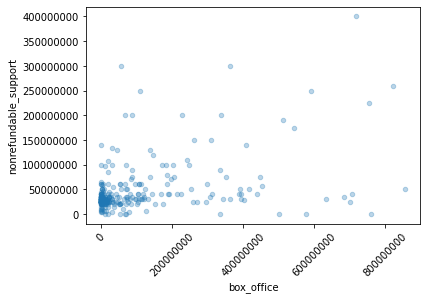

In [72]:
visualise_corr('nonrefundable_support')

Корреляция с ratings: 0.16374483244101332


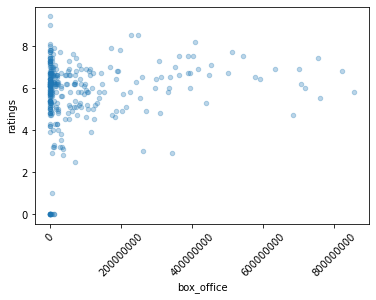

In [73]:
visualise_corr('ratings')

Корреляция с budget: 0.4258576276882038


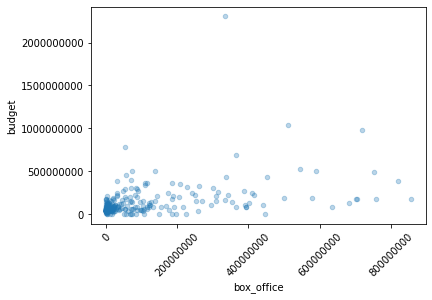

In [74]:
visualise_corr('budget')

Проверим, собирают ли режиссеры, чаще всего получающие гос.финансирование, больше денег в прокате.

In [75]:
top_directors = fund_df.pivot_table(index='main_director',values='box_office', aggfunc='sum').sort_values(by='box_office', ascending=False).head(20)
top_askers = fund_df.pivot_table(index='main_director', values='nonrefundable_support', aggfunc='sum').sort_values(by='nonrefundable_support',ascending=False).head(20)

print('Режжисеры, не вошедшие в топ-20 по сборам, получившие больше всего финансирования:')
print(*[name for name in top_askers.index if name not in top_directors.index], sep=', ')
        

Режжисеры, не вошедшие в топ-20 по сборам, получившие больше всего финансирования:
Р.Давлетьяров, А.Мизгирев, В.Тодоровский, П.Лунгин, Д.Тюрин, И.Джендубаев, Ф.Дмитриев, В.Саков


In [76]:
print('Режжисеры, вошедшие в топ-20 по сборам, получившие больше всего финансирования:')
print(*[name for name in top_askers.index if name in top_directors.index], sep=', ')

Режжисеры, вошедшие в топ-20 по сборам, получившие больше всего финансирования:
Н.Хомерики, А.Кравчук, С.Андреасян, Д.Козловский, К.Шипенко, И.Шурховецкий, Д.Киселев, Р.Прыгунов, А.Цицилин, А.Учитель, Т.Бекмамбетов, С.Мокрицкий


We see that there is a correlation between budget and money at the box office. This can be explained by the fact that more expensive films look higher quality and are more likely to be seen.

We can also see that not all directors who receive the most funding perform well at the box office.

For further analysis, let's divide the movies into 2 categories: 
* unprofitable (budget more money at the box office)
* profitable (budget less money at the box office)

In [77]:
winners_df = fund_df.query('(box_office>nonrefundable_support+refundable_support) or (box_office>budget)')
winners_df['title'].count()

115

In [78]:
losers_df = fund_df.query('(box_office<=nonrefundable_support+refundable_support) or (box_office<=budget)')
losers_df['title'].count()

239

We see that for the period from 2015 to 2019. 

* 115 films that received state funding received more money at the box office than was spent on their creation
* 239 films that received state funding received the same amount of money or less than the money spent on making them.

Let's try to find the formula for success. Let's check:
* Directors
* Genres
* Studios

And make a list of recommendations for funding.

In [79]:
winners_directors = winners_df['main_director'].value_counts()
losers_directors = losers_df['main_director'].value_counts()

print('Режиссеры с провальными фильмами')
print('\n')

for name in losers_directors.index:
    if name not in winners_directors.index and losers_directors[name]>1:
        print(f'Режиссер {name}, провалы в прокате {losers_directors[name]}')
        


Режиссеры с провальными фильмами


Режиссер А.Котт, провалы в прокате 3
Режиссер К.Худяков, провалы в прокате 2
Режиссер В.Хотиненко, провалы в прокате 2
Режиссер А.Темников, провалы в прокате 2
Режиссер А.Карпиловский, провалы в прокате 2
Режиссер А.Прошкин, провалы в прокате 2
Режиссер А.Федорченко, провалы в прокате 2
Режиссер И.Твердовский, провалы в прокате 2
Режиссер В.Глаголева, провалы в прокате 2
Режиссер А.Матисон, провалы в прокате 2
Режиссер А.Якимчук, провалы в прокате 2
Режиссер П.Лунгин, провалы в прокате 2
Режиссер Н.Меркулова, провалы в прокате 2


In [80]:
print('Режиссеры с провальными и успешными фильмами')
print('\n')

for name in losers_directors.index:
    if name in winners_directors.index and losers_directors[name]>1:
        print(f'Режиссер {name}, провалы в прокате {losers_directors[name]}, успехи в прокате {winners_directors[name]}')

Режиссеры с провальными и успешными фильмами


Режиссер Р.Давлетьяров, провалы в прокате 4, успехи в прокате 1
Режиссер С.Андреасян, провалы в прокате 3, успехи в прокате 4
Режиссер А.Цицилин, провалы в прокате 2, успехи в прокате 2
Режиссер Н.Хомерики, провалы в прокате 2, успехи в прокате 2
Режиссер В.Тодоровский, провалы в прокате 2, успехи в прокате 2
Режиссер Ф.Дмитриев, провалы в прокате 2, успехи в прокате 1
Режиссер М.Волков, провалы в прокате 2, успехи в прокате 2
Режиссер А.Аксененко, провалы в прокате 2, успехи в прокате 2
Режиссер А.Богуславский, провалы в прокате 2, успехи в прокате 2


In [81]:
print('Режиссеры с успешными фильмами')
print('\n')

for name in winners_directors.index:
    if name not in losers_directors.index and winners_directors[name]>1:
        print(f'Режиссер {name}, успехи в прокате {winners_directors[name]}')

Режиссеры с успешными фильмами


Режиссер Д.Дьяченко, успехи в прокате 3
Режиссер С.Подгаевский, успехи в прокате 2
Режиссер Р.Гигинеишвили, успехи в прокате 2
Режиссер В.Ровенский, успехи в прокате 2
Режиссер Д.Киселев, успехи в прокате 2
Режиссер Т.Бекмамбетов, успехи в прокате 2
Режиссер Р.Прыгунов, успехи в прокате 2
Режиссер Л.Марголин, успехи в прокате 2


We have compiled a list of directors with exceptionally failed films, the number of which is more than 1. 
And also directors of the "gray zone" - having both failures and successes.

Next, let's look at the genres.

In [82]:
winners_genres = winners_df['main_genre'].value_counts()
loser_genres = losers_df['main_genre'].value_counts()

print('Убыточные основные жанры:')
print(*[g for g in loser_genres.index if g not in winners_genres.index], sep=', ')
print('\n')
print('Прибыльные основные жанры:')
print(*[g for g in winners_genres.index if winners_genres[g]>loser_genres[g]], sep=', ')

Убыточные основные жанры:
мюзикл, детский, реальное ТВ


Прибыльные основные жанры:
мультфильм, семейный, спорт


Let's see which studios put out more unprofitable movies and which studios put out more profitable movies.

In [83]:
winner_studio = winners_df['main_studio'].value_counts()
loser_studio = losers_df['main_studio'].value_counts()

print('Студии, выпускающие исключительно убыточные фильмы')
print(*[s for s in loser_studio.index if s not in winner_studio.index and loser_studio[s]>=2], sep='\n')
print('\n')
print('Студии, выпускающие исключительно прибыльные фильмы:')
print(*[s for s in winner_studio.index if s not in loser_studio.index and winner_studio[s]>=2], sep='\n')

Студии, выпускающие исключительно убыточные фильмы
ООО "Продюсерский центр "Ленфильм"
ООО "Каро Продакшн"
ООО "Студия "Пассажир"
ООО "Продюсерский Центр "Хорошо Продакшн"
ООО "Киностудия "ВЕРТИКАЛЬ"
ООО "Нон-Стоп Продакшн"
ООО "Студия "СЛОН"
ООО "Продюсерский центр "ВГИК-Дебют"
ООО "Продюсерская компания Александра Литвинова"
ООО "Артлайт"
АО "ТПО "Киностудия им.М.Горького"
ООО "58
ООО "Телесто-фильм"
ООО "АРТЛАЙТ"
ООО "Мастерская Павла Лунгина"
ООО "РФГ Корп"
ООО "Компания "АТК-Студио"
ООО "Кинокомпания МАРС-фильм" по заказу ООО "МАРС МЕДИА ЭНТЕРТЕЙНМЕНТ"
ООО "Корпорация Русская Фильм Группа"
ФГУП "Киноконцерн "Мосфильм"
ООО "Каргофильм"
ООО "Студия ТРЕТИЙ РИМ"
ЗАО "Мотор фильм студия"
ООО "Компания "РЕАЛ-ДАКОТА"
ООО "Русские Золотые Серии"
ООО "Пан-Атлантик Студио"


Студии, выпускающие исключительно прибыльные фильмы:
АО "ВайТ Медиа"
ООО "Друг Друга"
ООО "Ол Медиа Компани"
ООО "Фреш-Фильм"
ООО "Киностудия "Слово"
ООО "КиноФирма"


We will recommend to finance the pictures of the following **directors:**
* D.Dyachenko
* T.Bekmambetov
* S.Podgaevsky
* V.Rovensky
* R.Prygunov
* D.Kiselev
* R.Gigineishvili
* L.Margolin

**Genres:**
* cartoon
* family
* sports

**Studios:**
* AO "White Media"
* LLC "Ol Media Company"
* OOO "Droog Druga"
* LLC "Slovo Film Studio"
* LLC "Fresh-Film"
* KinoFirma LLC

### Step 5: Write a general conclusion

We processed movie records from 2010 to 2019. We processed missing values, outliers, created new columns and studied the correlation between different parameters of a movie and its return at the box office. As a result, we found out the following.

**For the share of state support**
* Minimum share of government support: ~4%
* Average share of state support: ~52%
** Maximum share of state support: ~79%

**Film release dynamics**
In 2010, 985 films were released. After that there was a decline and an increase. In 2019, the figures are close to 2010 - 930 films.

##### Fees 
**For films without government funding:**
* Minimum collections rose from 2017 to 2018 with a peak of 41,000, then dropped to 35,000
* Maximum collections began a sharp rise from 2014 and peaked at 2.5 billion in 2019, after a slight dip in 2018.
* Median fees started rising in 2014, peaked in 2017 (9.5 million), then went into decline

**For movies with government funding:**
* Minimum collections have 2 peaks - 2013 and 2017.
* Maximum collections increased steadily until 2017, then dropped a bit after that, but s 2019 reached a peak of 3 billion.
* Median peaked in 2017 (50 million), after which the median went downward

##### Distribution revenue
**For all movies**
* Minimum revenue soared 4 times in 2016, followed by a downturn.
* Maximum revenue rose sharply from 2013 to 2017, after which it declined slightly and peaked in 2019

**For movies with government funding**
* Maximum revenue from film distribution jumped sharply in 2013.
* The minimum income got smaller from 2013 to 2014 by a factor of 7. By 2017 it was up, but lost ground in 2018

Curious note: The minimum box office for Russian films is ~20,000, while even if we consider unfinanced films whose box office is over 10,000, such amount becomes minimum only in 2017.

##### Fees and age limits
**For films without financing:**
*For the 2015 through 2019 time period, films 16+ grossed the most money at the box office. 12+ movies made the least
* In 2017, there was a turning point for all categories:
* Rental movies for all audiences reached a minimum value
       * Distribution of movies for kids 12+ started to grow
       * Distribution of movies for kids over 16 peaked, followed by a decline
       * Distribution of movies banned for children reached a minimum, followed by growth
* Movies for kids over 6 and movies banned for kids see an increase in box office money in 2019.

**For films that have received government funding:**

* The highest revenue comes from films in the 12+ category, followed by 6+. Films 0+ and 18+ are the least popular films
* 0+ and 18+ films received the least money at the box office.
* 12+ films received the most money at the box office
* 0+, 16+ and 18+ films started to grow in 2016. The performance of the last 2 deteriorated after 2018.
* For 2019, we can see an increase in the figures for 18+ and 6+ movies.

There is a difference between the money at the box office for films without government funding and with government funding. For the first group the biggest distribution for movies 16+, for the second group - 12+.

For both groups we see a trend towards an increase in distribution for 18+ films.

##### Survey of films with state funding
There is a correlation between budget and money at the box office. This can be explained by the fact that films that are more expensive to produce look higher quality and are more likely to be seen.

* 115 films that received state funding received more money at the box office than was spent on their production.
* 239 films that received government funding received the same amount of money or less than the money they cost to make.

Not all directors who receive the most funding do well at the box office.

##### Recommendations

We will recommend to finance the pictures of the following _directors_:

    D.Dyachenko
    T.Bekmambetov
    S.Podgaevsky
    V.Rovensky
    R.Prygunov
    D.Kiselev
    R.Gigineishvili
    L.Margolin

_Genres:_

    cartoon
    family
    sport

_Studios:_

    White Media JSC
    OOO "Ol Media Company"
    LLC "Friend of a Friend"
    LLC "Film Studio "Slovo"
    LLC "Fresh-Film"
    LLC "KinoFirma"

_Age restrictions:_

    "12+" - for children over 12 years old
    
##### Hypotheses for further research on the dependence of fees
1. cast and fees
2. Promotional costs and fees
